In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plot

In [3]:
file_name_bbc = 'BBC_reading/exсel_files/bbc_scraping.xlsx'
file_name_nz = 'BBC_reading/exсel_files/zn_ua_scraping.xlsx'
file_name_csv = '../sas/report/report2.csv'

csv_final_report = pd.read_csv(file_name_csv)
excel_bbc_texts = pd.read_excel(file_name_bbc, index_col=0)
excel_nz_texts = pd.read_excel(file_name_nz, index_col=0)

In [3]:
csv_final_report.head

<bound method NDFrame.head of      file_code  pass  is_fail_doc  \
0        bbc_0     1            0   
1        bbc_0     1            0   
2        bbc_0     1            0   
3        bbc_0     1            0   
4        bbc_0     1            0   
...        ...   ...          ...   
9706    zn_842     1            0   
9707    zn_842     1            0   
9708    zn_843     1            0   
9709    zn_843     1            0   
9710    zn_843     1            0   

                                          category_name  relevancy  \
0                         Top/politics/healthcarepolicy        1.0   
1     Top/politics/healthcarepolicy/quarntine_streng...        1.0   
2                                            Top/events        1.0   
3                          Top/events/onlinetransformed        1.0   
4                              Top/economy/coronacrisis        1.0   
...                                                 ...        ...   
9706                               

In [4]:
excel_bbc_texts.head

<bound method NDFrame.head of            Date                       Author  Main_Topics  \
0    22/03/2020                          NaN     Здоров'я   
1    22/03/2020                          NaN     Здоров'я   
2    22/03/2020                          NaN     Здоров'я   
3    22/03/2020              Ольга Паламарюк     Здоров'я   
4    22/03/2020               BBC Моніторинг     Здоров'я   
..          ...                          ...          ...   
866  12/05/2020  Говард Мусто і Сем Проффітт  Коронавірус   
867  13/05/2020                          NaN  Коронавірус   
868  13/05/2020                          NaN  Коронавірус   
869  13/05/2020                          NaN  Коронавірус   
870  13/05/2020                          NaN  Коронавірус   

                                                 Topic  \
0    Надія є: п'ять причин порадіти під час пандемі...   
1           Маски: щоб захистити інших, а не вас - МОЗ   
2       Коронавірус: як у світі запроваджують карантин   
3    

In [5]:
excel_nz_texts.head

<bound method NDFrame.head of             Date  Author Main_Topics  \
0     05/04/2020     NaN    Політика   
1     05/04/2020     NaN    Політика   
2     05/04/2020     NaN    Політика   
3     05/04/2020     NaN    Політика   
4     05/04/2020     NaN    Політика   
...          ...     ...         ...   
3026  14/05/2020     NaN     Україна   
3027  14/05/2020     NaN     Україна   
3028  14/05/2020     NaN     Україна   
3029  14/05/2020     NaN     Україна   
3030  14/05/2020     NaN     Україна   

                                                  Topic  \
0     Постпред України в ООН розповів, як Росія пере...   
1     З початку року в Донбасі 12 осіб загинули від ...   
2     Людина Ахметова стала позаштатним радником пре...   
3          НАБУ завершило розслідування справи Гримчака   
4                           НАБУ допитало Дениса Єрмака   
...                                                 ...   
3026  На Закарпатті обрушився кінотеатр: з-під завал...   
3027  COVID-19 до

In [4]:
name_colums_for_new_csv = ['file_code', 'class', 'date']
new_csv = pd.DataFrame(zip(csv_final_report.file_code, csv_final_report.category_name, csv_final_report.date), columns=name_colums_for_new_csv)

In [7]:
new_csv.head

<bound method NDFrame.head of      file_code                                              class  \
0        bbc_0                      Top/politics/healthcarepolicy   
1        bbc_0  Top/politics/healthcarepolicy/quarntine_streng...   
2        bbc_0                                         Top/events   
3        bbc_0                       Top/events/onlinetransformed   
4        bbc_0                           Top/economy/coronacrisis   
...        ...                                                ...   
9706    zn_842                                       Top/politics   
9707    zn_842  Top/politics/healthcarepolicy/quarntine_streng...   
9708    zn_843                                 Top/health/recover   
9709    zn_843                           Top/health/dissemination   
9710    zn_843                                   Top/technologies   

                      date  
0     11May2014 11:15:36.0  
1     11May2014 11:15:36.0  
2     11May2014 11:15:36.0  
3     11May2014 11:15:36.

In [5]:
def preparation():
    
    for index in range(len(csv_final_report)):
        source_name = (re.findall('zn|bbc',new_csv.loc[index][0]))[0]
        count_in_table = re.findall('_\d{0,10}', new_csv.loc[index][0])
        count_in_table = int(count_in_table[0].replace('_', ''))

        if source_name == 'bbc':
            new_csv.loc[index][2] = pd.to_datetime(excel_bbc_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
        elif source_name == 'zn':
            new_csv.loc[index][2] = pd.to_datetime(excel_nz_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
    
    my_classes = list(set(new_csv['class']))
    len_my_classes = len(my_classes)
    
    return my_classes,len_my_classes

In [6]:
my_classes, len_my_classes = preparation()
my_classes

['Top/politics/healthcarepolicy/education',
 'Top/economy',
 'Top/society/death',
 'Top/technologies/developingofequipment',
 'Top/politics/healthcarepolicy/transport',
 'Top/economy/coronaimport',
 'Top/politics/healthcarepolicy/quarntine_strengthening',
 'Top/economy/coronabusiness',
 'Top/society/potentialdeath',
 'Top/health/dissemination',
 'Top/politics',
 'Top/society/familytroubles',
 'Top/politics/healthcarepolicy/safetysteps',
 'Top/economy/coronacrisis',
 'Top/coronavirus',
 'Top/technologies',
 'Top/society/producthisteria',
 'Top/politics/healthcarepolicy/entertaiment',
 'Top/society',
 'Top/science/developingvaccine',
 'Top/health/illness',
 'Top/events/onlinetransformed',
 'Top/health',
 'Top/politics/criminal',
 'Top/science/existeddrugs',
 'Top/health/recover',
 'Top/science',
 'Top/events',
 'Top/politics/healthcarepolicy',
 'Top/economy/coronajobloss',
 'Top/economy/crisis',
 'Top/society/potentialdeathhisteria',
 'Top/science/developingnewdrugs',
 'Top/events/corona

In [7]:
def create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day):
    
    all_source_for_bars = pd.DataFrame(columns=my_classes)
    dates_period = pd.DataFrame(columns=my_classes)
    
    last_day = pd.to_datetime(last_day,format='%d/%m/%Y')
    start_period = pd.to_datetime(first_day,format='%d/%m/%Y')
    period_time = pd.Timedelta(days=days_period)
    bool_parametr = True
    
    while bool_parametr:
        end_period = start_period + period_time
        
        if end_period >= last_day:
            bool_parametr = False
            end_period = last_day
            break
        
        counts_dateFrame = pd.DataFrame(columns=name_colums_for_new_csv)
        counts_dates = pd.DataFrame(columns=['start_period','end_period'])
        counts_list = np.array([])
        counts_dates_array = np.array([start_period, end_period])
        
        counts_dates_temp = pd.DataFrame([counts_dates_array],columns=['start_period','end_period']) 
        counts_dates = counts_dates.append(counts_dates_temp, ignore_index=True)
        
        for index,name_class in enumerate(my_classes):

            counts_dateFrame = new_csv[(new_csv['class'] == name_class) & (start_period <= new_csv['date']) & (new_csv['date'] <= end_period)]
            # print(counts_dateFrame.head)
            count = len(counts_dateFrame)

            # print(f"count\t{count}\nindex\t{index}")
            counts_list = np.append(counts_list, count)
        
        all_summ = np.sum(counts_list)
        counts_list = (counts_list / all_summ ) * 100
        
        temp_count_table = pd.DataFrame([counts_list],columns=my_classes) 
        all_source_for_bars = all_source_for_bars.append(temp_count_table, ignore_index=True)
        
        start_period = end_period + pd.Timedelta(days=1)
    
    return all_source_for_bars, counts_dates

In [8]:
days_period = 3 
first_day = '03/03/2020' 
last_day = '12/05/2020'
all_source_bars,dates = create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day)

In [12]:
all_source_bars.head

<bound method NDFrame.head of     Top/technologies  Top/economy/coronabusiness  Top/politics/criminal  \
0           0.000000                    0.000000               0.000000   
1           0.000000                    0.000000               0.000000   
2           0.000000                    0.000000               0.000000   
3           0.330033                    0.330033               1.320132   
4           0.320513                    0.961538               0.000000   
5           0.963391                    0.578035               0.578035   
6           0.852878                    0.000000               0.000000   
7           1.328904                    0.221484               0.885936   
8           2.321263                    0.185701               0.464253   
9           4.258675                    0.000000               0.630915   
10          4.105090                    0.164204               0.164204   
11          2.684564                    0.167785               0.50335

In [13]:
res_without_dates = all_source_bars.drop([0], axis=0)
res_without_dates.head

<bound method NDFrame.head of     Top/technologies  Top/economy/coronabusiness  Top/politics/criminal  \
1           0.000000                    0.000000               0.000000   
2           0.000000                    0.000000               0.000000   
3           0.330033                    0.330033               1.320132   
4           0.320513                    0.961538               0.000000   
5           0.963391                    0.578035               0.578035   
6           0.852878                    0.000000               0.000000   
7           1.328904                    0.221484               0.885936   
8           2.321263                    0.185701               0.464253   
9           4.258675                    0.000000               0.630915   
10          4.105090                    0.164204               0.164204   
11          2.684564                    0.167785               0.503356   
12          2.995392                    0.345622               0.34562

In [9]:
import chart_studio.plotly.plotly as plotly
from plotly.graph_objs import *
from chart_studio.plotly import iplot 
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_dark"

plotly.sign_in('pavloboiko', 'az5LvJJAnnHGiWxie4Rq')

ax = res_without_dates.iplot(kind='bar', histnorm='percent',
    barmode='overlay', xTitle='period',
                  yTitle='percent', title='Coronovirus')


res_without_dates.iplot(kind='bar', histnorm='percent',
    barmode='overlay', xTitle='period',
                  yTitle='count', title='Coronovirus')



ModuleNotFoundError: No module named 'chart_studio'

In [15]:
cf.set_config_file(offline=True, world_readable=False)
res_without_dates[['Top/health/recover', 'Top/society/death']].iplot(kind='line', histnorm='percent', xTitle='percent',yTitle='count', title='Top/health/recover and Top/health/death')

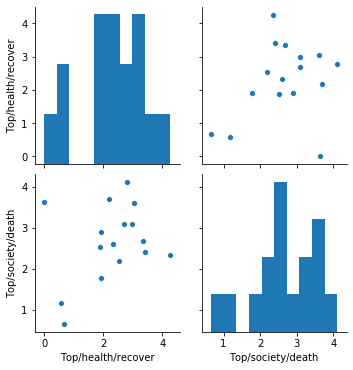

In [16]:

import seaborn as sns
sns_plot = sns.pairplot(res_without_dates[['Top/health/recover', 'Top/society/death']])
sns_plot.savefig('pairplot.png')